In [121]:
# External Modules
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd

# Internal Modules
import explanatory_images as img_gen

# Aspect Ratio

This notebook covers one of the most overlooked, yet critical, aspects of creating charts, **aspect ratio.**

First, we'll set the ground by setting definitions, clarifying misconceptions, and showing how to set the aspect ratio with matplotlib.

Then, recommendations are given for the correct use of aspect ratios for two different types of graphs: 
- Graph with shared units (i.e., where X and Y have the same units).
- Graph with distinct units (ex. time series where X is time and Y may be temperature or a dollar amount)


- [1.0 Aspect Ratio Fundamentals](#1.0-Aspect-Ratio-Fundamentals)
 - [1.1 Same Square. Different Looks.](#1.1-Same-Square.-Different-Looks.)
 - [1.2 With Shared Units, it is not about the axis ranges or length.](#1.2-With-Shared-Units,-it-is-not-about-the-axis-ranges-or-length.)
 - [1.3 Aspect Ratio affects Visual Perception](#1.3-Aspect-Ratio-affects-Visual-Perception)
 - [1.4 Be Careful with Default Aspect Ratios](#1.4-Be-Careful-with-Default-Aspect-Ratios)

## 1.0 Aspect Ratio Fundamentals

- The aspect ratio of a data graph is generally defined as the width-to-height ($w$ / $h$) ratio of the graph’s size. 

- **However, when graphs share the same units** (ex., both axes are in degrees or dollars), I think it is better defined as the ratio of:

$$\dfrac{\text{Size of 1 unit in y-data coordinates}}{\text{Size of 1 unit in x-data coordinates}}$$


### 1.1 Same Square. Different Looks.

From the [matplotlib docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html)

- aspect=1 a square in data coordinates will be a true square.
- aspect=2 a square in data coordinates will be rendered with a height of twice its width.
- aspect=0.5 a square in data coordinates will be rendered with a height of half its width.

- MENTAL PICTURE: If you were to measure 1" in **y**, is that the same amount as 1" in the **x** direction?

We are specifying the exact same square patch for the three different aspect ratios. 

`
from matplotlib.patches import Rectangle
square = Rectangle(xy=(4, 4), width=2, height=2)      # Square with lower left corner at (4,4) and length of 2.
`

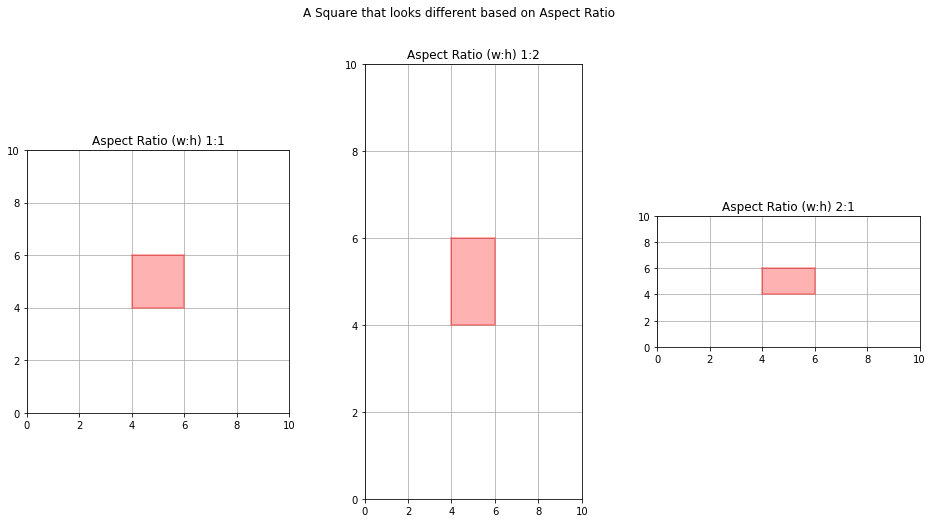

In [2]:
fig = img_gen.plot_squares(figsize = (16,8))
plt.show()

### 1.2 With Shared Units, it is not about the axis ranges or length.

A common misWhen the two axes have the same units, the aspect ratio doesn't have to do with the axis limits but merely with the size in the paper of 1 unit. Here is the proof:

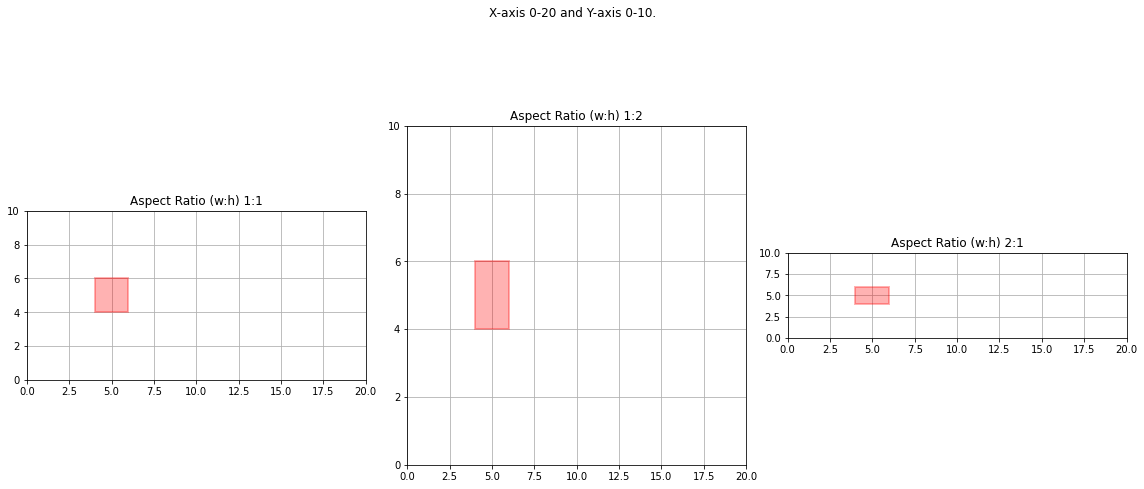

In [3]:
fig = img_gen.plot_squares_longer_xaxis(figsize = (16,8))
plt.show()

### 1.3 Aspect Ratio affects Visual Perception

The choice of aspect ratio determines the perception of steepness in slope. Let's look at three scenarios below:
- 1:1 Square aspect ratio. This is the correct aspect ratio since both axes are measured in the same units.
- 1:2 Tall aspect ratio. Suggests a much steeper slope.
- 2:1 Wide aspect ratio. Suggests a less steeper slope.

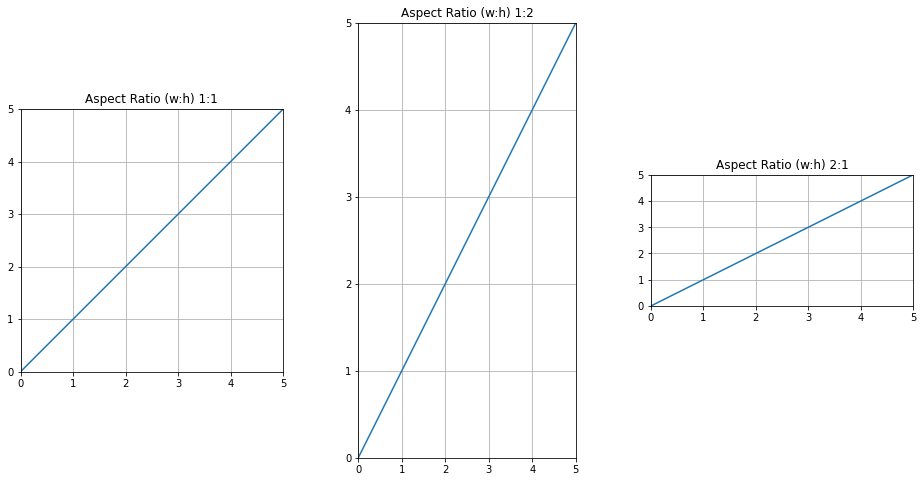

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,8))
x = [0, 1, 3, 4, 5]
y = x
for plot, asp_ratio, asp_ratio_str in zip(ax, ['equal', 2, 0.5], ['1:1', '1:2', '2:1']):
    plot.grid()
    plot.set_xlim(0,5)
    plot.set_ylim(0,5)
    plot.plot(x,y)
    plot.set_aspect(asp_ratio)
    plot.set_title('Aspect Ratio (w:h) ' + asp_ratio_str)
plt.show()

### 1.4 Be Careful with Default Aspect Ratios

In [5]:
df = pd.read_csv('temperature.csv')
df.head()

,Month,Austin,San Diego,Detroit
0,Jan,48,57,25
1,Feb,54,58,27
2,Mar,62,60,37
3,Apr,70,62,48
4,May,76,64,60


In [19]:
temp_aus = df['Austin'].values
temp_sd = df['San Diego'].values
temp_dtw = df['Detroit'].values

# Appending initial value so we get a closed polygon
temp_aus = np.append(temp_aus, temp_aus[0])
temp_sd = np.append(temp_sd, temp_sd[0])
temp_dtw = np.append(temp_dtw, temp_dtw[0])

In [164]:
def plot_temps(ax, xArr, yArr, aspect_ratio, x_label, y_label, title, xrange = None, yrange= None):


    ax.plot(xArr, yArr)
        
    # Adding Text
    for i, txt in zip([0, 3, 6, 9], ['Jan 1st', 'Apr 1st', 'Jul 1st', 'Oct 1st']):
        ax.text(xArr[i], yArr[i] + 1 , txt, verticalalignment='bottom', horizontalalignment='center')
        ax.scatter(xArr[i], yArr[i], s = 15, marker = 'o', c = 'black' )
    
    
    # Plotting Reference Line
    ax.plot(np.arange(50,85+1,1), np.arange(50,85+1,1), 
            linestyle = '--', color = 'firebrick', label='Slope = 1:1')
      
    # Adding Testing Square
    square_props = dict(edgecolor = 'red', alpha = 0.3, fill = True, lw = 2,
                        facecolor ='red')
    square = Rectangle((55, 75), width = 5, height = 5, **square_props)
    ax.add_patch(square)
    ax.text(57.5, 77.5 , 'Test', verticalalignment='center', horizontalalignment='center', 
            **dict(fontname="Arial", fontsize='large', fontweight = 'bold', color = 'black'))
    
    # Aesthetics
    ax.grid()
    ax.set_axisbelow(True)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_aspect(aspect_ratio)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_xlim(xrange)
    ax.set_ylim(yrange)
    ax.set_title(title)  
        
    return ax

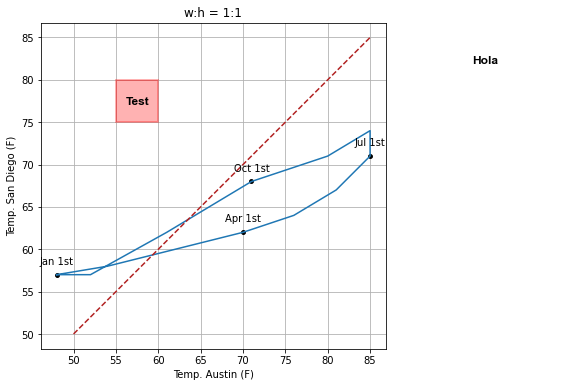

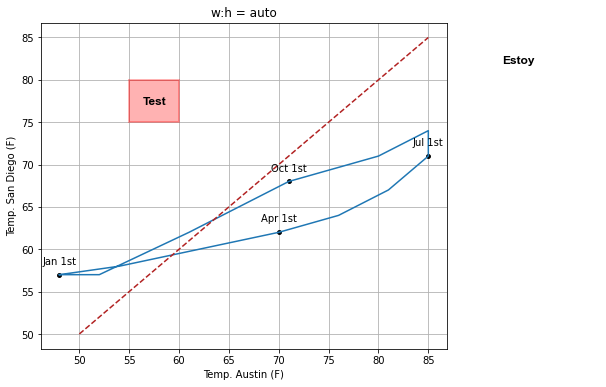

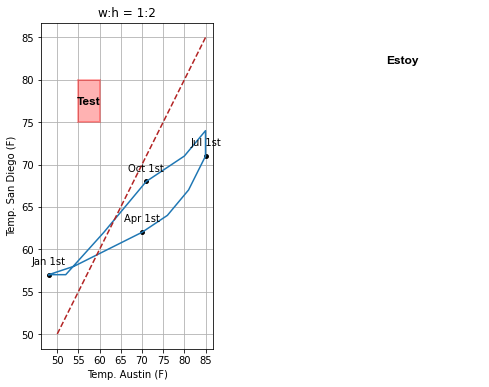

In [165]:
def dummy_axes(ax, txt = ""):
    ax.axis('off')
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    font_props_fig = dict(fontname="Arial", fontsize='large',
                        fontweight = 'bold', color = 'black')
    ax.text( x = 5, y = 90, s = txt, verticalalignment='top', horizontalalignment='left', **font_props_fig)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,6), gridspec_kw = dict(width_ratios = [0.8, 0.2]))
plot_temps(ax[0], temp_aus, temp_sd, 'equal', 'Temp. Austin (F)', 'Temp. San Diego (F)', "w:h = 1:1")
dummy_axes(ax[1], 'Hola')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,6), gridspec_kw = dict(width_ratios = [0.8, 0.2]))
plot_temps(ax[0], temp_aus, temp_sd, 'auto', 'Temp. Austin (F)', 'Temp. San Diego (F)', "w:h = auto")
dummy_axes(ax[1], 'This is whay')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,6), gridspec_kw = dict(width_ratios = [0.8, 0.2]))
plot_temps(ax[0], temp_aus, temp_sd, 2, 'Temp. Austin (F)', 'Temp. San Diego (F)', "w:h = 1:2")
dummy_axes(ax[1], 'Estoy')
plt.show()

In [12]:
ax.get_aspect()

2.0

## Aspect Ratio in Time Series

# Banking to 45$^\circ$

In [13]:
## 